# Covid-19 Data Analysis

### Data Source: 
https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_daily_reports



#### Read the dataset

In [100]:
import pandas as pd

covid_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/06-15-2021.csv')

#### Display the top 5 rows in the data

In [101]:
print(covid_data.head())

   FIPS Admin2 Province_State Country_Region          Last_Update       Lat  \
0   NaN    NaN            NaN    Afghanistan  2021-06-16 04:22:32  33.93911   
1   NaN    NaN            NaN        Albania  2021-06-16 04:22:32  41.15330   
2   NaN    NaN            NaN        Algeria  2021-06-16 04:22:32  28.03390   
3   NaN    NaN            NaN        Andorra  2021-06-16 04:22:32  42.50630   
4   NaN    NaN            NaN         Angola  2021-06-16 04:22:32 -11.20270   

       Long_  Confirmed  Deaths  Recovered   Active Combined_Key  \
0  67.709953      93272    3683    61820.0  27769.0  Afghanistan   
1  20.168300     132469    2454   129879.0    136.0      Albania   
2   1.659600     134115    3588    93355.0  37172.0      Algeria   
3   1.521800      13828     127    13626.0     75.0      Andorra   
4  17.873900      36921     842    30775.0   5304.0       Angola   

   Incident_Rate  Case_Fatality_Ratio  
0     239.599216             3.948666  
1    4603.134339             1.85250

#### Show the information of the dataset

In [102]:
print(covid_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4014 entries, 0 to 4013
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   FIPS                 3266 non-null   float64
 1   Admin2               3271 non-null   object 
 2   Province_State       3835 non-null   object 
 3   Country_Region       4014 non-null   object 
 4   Last_Update          4014 non-null   object 
 5   Lat                  3924 non-null   float64
 6   Long_                3924 non-null   float64
 7   Confirmed            4014 non-null   int64  
 8   Deaths               4014 non-null   int64  
 9   Recovered            737 non-null    float64
 10  Active               737 non-null    float64
 11  Combined_Key         4014 non-null   object 
 12  Incident_Rate        3924 non-null   float64
 13  Case_Fatality_Ratio  3971 non-null   float64
dtypes: float64(7), int64(2), object(5)
memory usage: 439.2+ KB
None


#### Show the sum of missing values of features in the dataset

In [103]:
print(covid_data.isnull().sum())

FIPS                    748
Admin2                  743
Province_State          179
Country_Region            0
Last_Update               0
Lat                      90
Long_                    90
Confirmed                 0
Deaths                    0
Recovered              3277
Active                 3277
Combined_Key              0
Incident_Rate            90
Case_Fatality_Ratio      43
dtype: int64


#### Show the number of Confirmed cases by Country

In [104]:
confirmed_by_country = covid_data.groupby('Country_Region')['Confirmed'].sum().reset_index()
print(confirmed_by_country)

           Country_Region  Confirmed
0             Afghanistan      93272
1                 Albania     132469
2                 Algeria     134115
3                 Andorra      13828
4                  Angola      36921
..                    ...        ...
196    West Bank and Gaza     311948
197  Winter Olympics 2022          0
198                 Yemen       6864
199                Zambia     115824
200              Zimbabwe      40318

[201 rows x 2 columns]


#### Show the number of Deaths by Country

In [105]:
deaths_by_country = covid_data.groupby('Country_Region')['Deaths'].sum().reset_index()
print(deaths_by_country.head())

  Country_Region  Deaths
0    Afghanistan    3683
1        Albania    2454
2        Algeria    3588
3        Andorra     127
4         Angola     842


#### Show the number of Recovered cases by Country

In [106]:
recovered_by_country = covid_data.groupby('Country_Region')['Recovered'].sum().reset_index()
print(recovered_by_country)

           Country_Region  Recovered
0             Afghanistan    61820.0
1                 Albania   129879.0
2                 Algeria    93355.0
3                 Andorra    13626.0
4                  Angola    30775.0
..                    ...        ...
196    West Bank and Gaza   304390.0
197  Winter Olympics 2022        0.0
198                 Yemen     3775.0
199                Zambia    99895.0
200              Zimbabwe    37056.0

[201 rows x 2 columns]


#### Show the number of Active Cases by Country

In [107]:
active_case_by_country = covid_data.groupby('Country_Region')['Active'].sum().reset_index()
print(active_case_by_country)

           Country_Region   Active
0             Afghanistan  27769.0
1                 Albania    136.0
2                 Algeria  37172.0
3                 Andorra     75.0
4                  Angola   5304.0
..                    ...      ...
196    West Bank and Gaza   4016.0
197  Winter Olympics 2022      0.0
198                 Yemen   1739.0
199                Zambia  14485.0
200              Zimbabwe   1625.0

[201 rows x 2 columns]


#### Show the latest number of Confirmed, Deaths, Recovered and Active cases Country-wise

In [108]:
latest_stats_by_country = covid_data.groupby('Country_Region').agg({
    'Confirmed': 'last',
    'Deaths': 'last',
    'Recovered': 'last',
    'Active': 'last'
}).reset_index()
print(latest_stats_by_country)

           Country_Region  Confirmed  Deaths  Recovered   Active
0             Afghanistan      93272    3683    61820.0  27769.0
1                 Albania     132469    2454   129879.0    136.0
2                 Algeria     134115    3588    93355.0  37172.0
3                 Andorra      13828     127    13626.0     75.0
4                  Angola      36921     842    30775.0   5304.0
..                    ...        ...     ...        ...      ...
196    West Bank and Gaza     311948    3542   304390.0   4016.0
197  Winter Olympics 2022          0       0        0.0      0.0
198                 Yemen       6864    1350     3775.0   1739.0
199                Zambia     115824    1444    99895.0  14485.0
200              Zimbabwe      40318    1637    37056.0   1625.0

[201 rows x 5 columns]


### Show the countries with no recovered cases

In [109]:
no_recovered_countries = covid_data[covid_data['Recovered'] == 0][['Country_Region', 'Recovered']]
print(no_recovered_countries)

      Country_Region  Recovered
9          Australia        0.0
23           Belgium        0.0
24           Belgium        0.0
25           Belgium        0.0
26           Belgium        0.0
...              ...        ...
4009         Ukraine        0.0
4010           Nauru        0.0
4011     New Zealand        0.0
4012          Tuvalu        0.0
4013  United Kingdom        0.0

[130 rows x 2 columns]


#### Show the countries with no confirmed cases

In [110]:
no_confirmed_countries = covid_data[covid_data['Confirmed'] == 0]['Country_Region']
print(no_confirmed_countries)

78                    Canada
282                    India
417                   Mexico
616                    Spain
704                       US
716                       US
725                       US
748                       US
762                       US
766                       US
951                       US
1221                      US
1264                      US
1451                      US
1636                      US
1663                      US
1829                      US
1866                      US
1897                      US
2162                      US
2282                      US
2342                      US
2456                      US
2565                      US
2740                      US
2825                      US
2893                      US
2944                      US
3010                      US
3099                      US
3149                      US
3215                      US
3725                      US
3824                      US
3894          

#### Show the countries with no deaths

In [111]:
no_deaths_countries = covid_data[covid_data['Deaths'] == 0][['Country_Region', 'Deaths']]
print(no_deaths_countries)

      Country_Region  Deaths
10         Australia       0
23           Belgium       0
24           Belgium       0
25           Belgium       0
26           Belgium       0
...              ...     ...
4009         Ukraine       0
4010           Nauru       0
4011     New Zealand       0
4012          Tuvalu       0
4013  United Kingdom       0

[216 rows x 2 columns]


In [112]:
no_deaths_countries_with_others = covid_data[covid_data['Deaths'] == 0][['Country_Region', 'Confirmed',  'Deaths', 'Recovered']]
print(no_deaths_countries_with_others)

      Country_Region  Confirmed  Deaths  Recovered
10         Australia        175       0      173.0
23           Belgium     140267       0        0.0
24           Belgium     132450       0        0.0
25           Belgium     123386       0        0.0
26           Belgium      81982       0        0.0
...              ...        ...     ...        ...
4009         Ukraine          0       0        0.0
4010           Nauru          0       0        0.0
4011     New Zealand          0       0        0.0
4012          Tuvalu          0       0        0.0
4013  United Kingdom          0       0        0.0

[216 rows x 4 columns]


#### Show the Top 10 countries with Confirmed cases

In [113]:
top_confirmed_countries = covid_data.groupby('Country_Region').agg({
    'Last_Update': 'last',
    'Confirmed': 'max',
    'Deaths': 'max',
    'Recovered': 'max'
}).nlargest(10, 'Confirmed').reset_index()
print(top_confirmed_countries)

   Country_Region          Last_Update  Confirmed  Deaths  Recovered
0           India  2021-06-16 04:22:32    5924773  114154  5669179.0
1          France  2021-06-16 04:22:32    5681846  109649   337467.0
2          Turkey  2021-06-16 04:22:32    5342028   48879  5211022.0
3       Argentina  2021-06-16 04:22:32    4172742   86615  3771968.0
4  United Kingdom  2021-06-16 04:22:32    3994408  133163     4205.0
5          Brazil  2021-06-16 04:22:32    3487385  119110  3121444.0
6            Iran  2021-06-16 04:22:32    3049648   82351  2683210.0
7          Poland  2021-06-16 04:22:32    2877819   74626  2649080.0
8       Indonesia  2021-06-16 04:22:32    1927708   53280  1757641.0
9    South Africa  2021-06-16 04:22:32    1761066   58087  1616405.0


#### Show the Top 10 Countries with Active cases

In [114]:
top_active_countries = covid_data.groupby('Country_Region').agg({
    'Last_Update': 'last',
    'Confirmed': 'max',
    'Deaths': 'max',
    'Recovered': 'max',
    'Active': 'max'
}).nlargest(10, 'Active').reset_index()
print(top_active_countries)

   Country_Region          Last_Update  Confirmed  Deaths  Recovered  \
0          France  2021-06-16 04:22:32    5681846  109649   337467.0   
1  United Kingdom  2021-06-16 04:22:32    3994408  133163     4205.0   
2            Peru  2021-06-16 04:22:32     893816   85421  1968723.0   
3          Serbia  2021-06-16 04:22:32     715147    6976        0.0   
4           Spain  2021-04-25 23:20:49     724685   15388    40736.0   
5          Mexico  2021-06-16 04:22:32     669037   37166  1960033.0   
6        Slovakia  2021-06-16 04:22:32     773906   12446   255300.0   
7     Netherlands  2021-06-16 04:22:32     401575    4283    12145.0   
8     Switzerland  2021-06-16 04:22:32     700978   10752   317600.0   
9          Brazil  2021-06-16 04:22:32    3487385  119110  3121444.0   

      Active  
0  5234730.0  
1  3881901.0  
2   808395.0  
3   708171.0  
4   668561.0  
5   634649.0  
6   506160.0  
7   394953.0  
8   372626.0  
9   322645.0  


#### Plot Country-wise Total deaths, confirmed, recovered and active casaes where total deaths have exceeded 50,000

In [115]:
import matplotlib.pyplot as plt

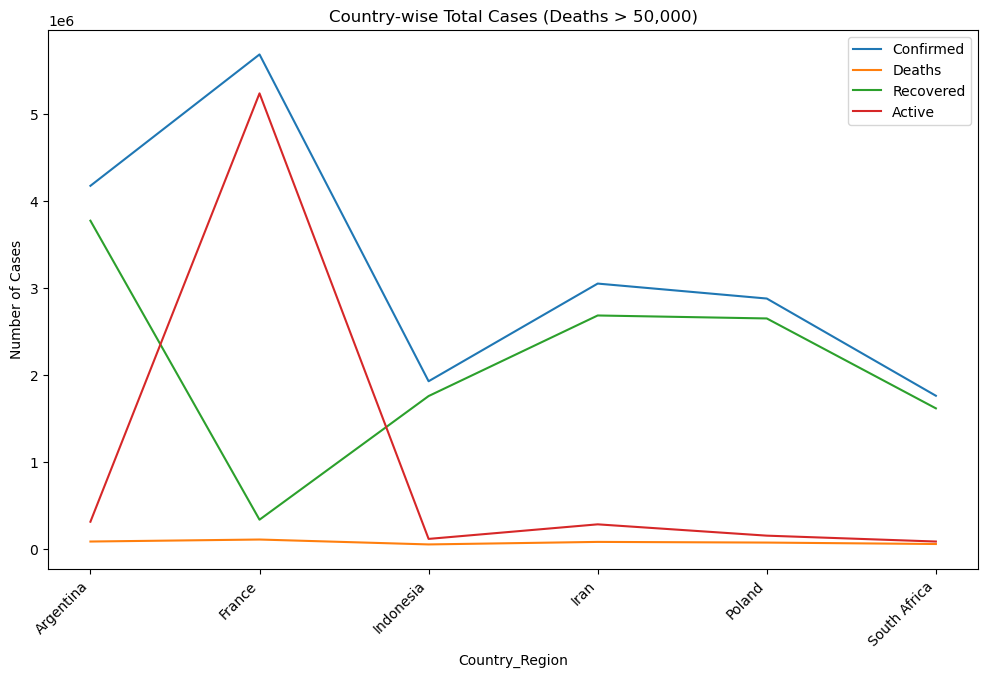

In [152]:
high_death_countries = latest_stats_by_country[latest_stats_by_country['Deaths'] > 50000]


if not high_death_countries.empty:

    fig, ax = plt.subplots(figsize=(12, 7))
    high_death_countries.set_index('Country_Region')[['Confirmed', 'Deaths', 'Recovered', 'Active']].plot(kind='line', ax=ax)
    ax.set_ylabel('Number of Cases')
    ax.set_title('Country-wise Total Cases (Deaths > 50,000)')
    plt.xticks(rotation=45, ha='right')
    plt.show()
else:
    print("No data available for countries with deaths greater than 50,000.")

### Plot Province/State wise Deaths in USA

In [127]:
import plotly.express as px

In [128]:
covid_data= pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-09-2021.csv')

In [129]:
print(covid_data.columns)

Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incident_Rate', 'Case_Fatality_Ratio'],
      dtype='object')


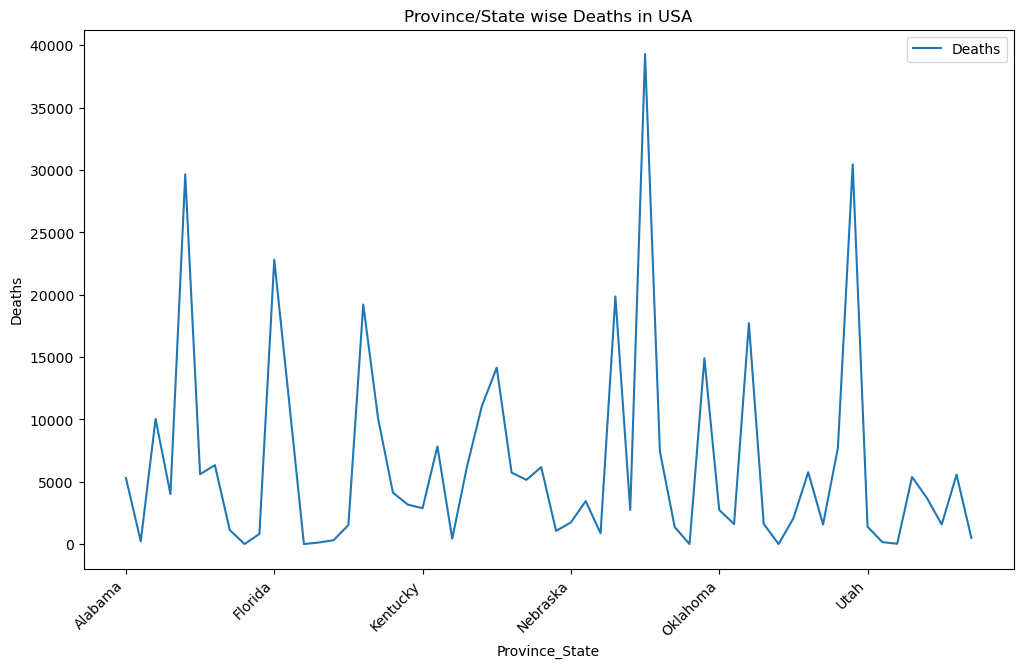

In [134]:
usa_deaths = covid_data[covid_data['Country_Region'] == 'US'].groupby('Province_State')['Deaths'].sum().reset_index()
fig, ax = plt.subplots(figsize=(12, 7))
usa_deaths.set_index('Province_State')[['Deaths']].plot(kind='line', ax=ax)
ax.set_ylabel('Deaths')
ax.set_title('Province/State wise Deaths in USA')
plt.xticks(rotation=45, ha='right')
plt.show()

### Plot Province/State Wise Active Cases in USA

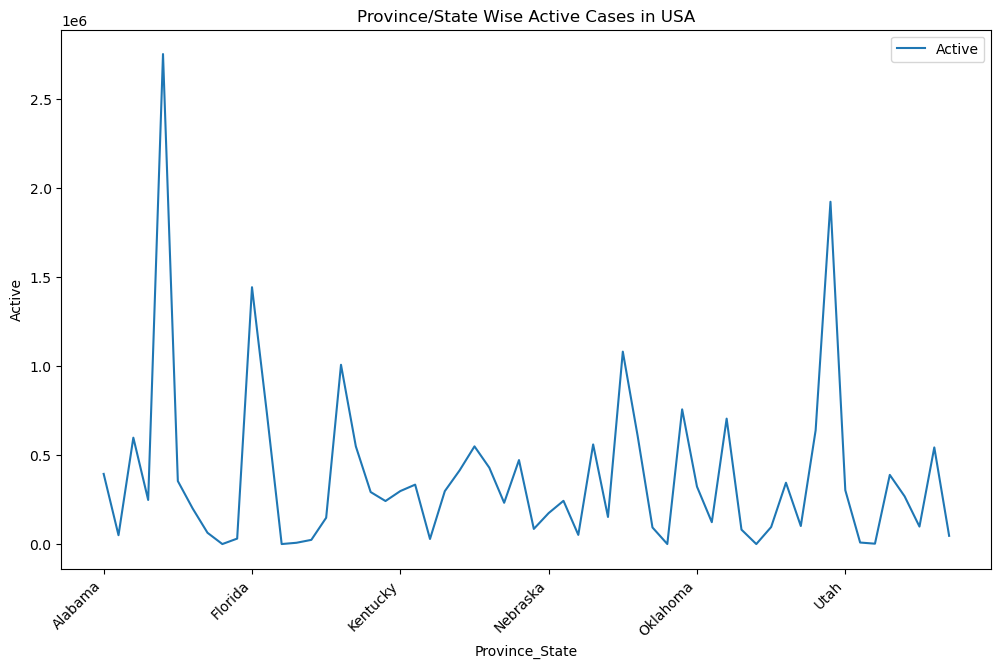

In [139]:
use_deaths = covid_data[covid_data['Country_Region'] == 'US'].groupby('Province_State')['Active'].sum().reset_index()

fig, ax = plt.subplots(figsize=(12,7))
use_deaths.set_index('Province_State')[['Active']].plot(kind='line', ax=ax)
ax.set_ylabel('Active')
ax.set_title('Province/State Wise Active Cases in USA')
plt.xticks(rotation=45, ha='right')
plt.show()

### Plot Province/State Wise Confirmed cases in USA

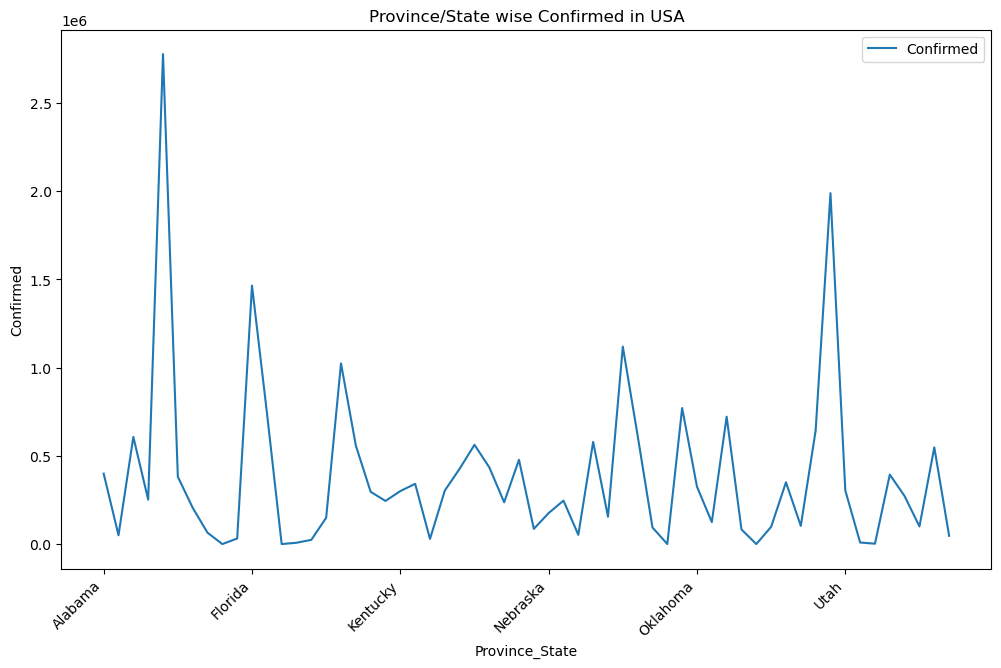

In [146]:
usa_deaths = covid_data[covid_data['Country_Region'] == 'US'].groupby('Province_State')['Confirmed'].sum().reset_index()
fig, ax = plt.subplots(figsize=(12, 7))
usa_deaths.set_index('Province_State')[['Confirmed']].plot(kind='line', ax=ax)
ax.set_ylabel('Confirmed')
ax.set_title('Province/State Wise Confirmed cases in USA')
plt.xticks(rotation=45, ha='right')
plt.show()

### Plot Worldwide Confirmed Cases over time

In [24]:
import plotly.express as px
import plotly.io as pio


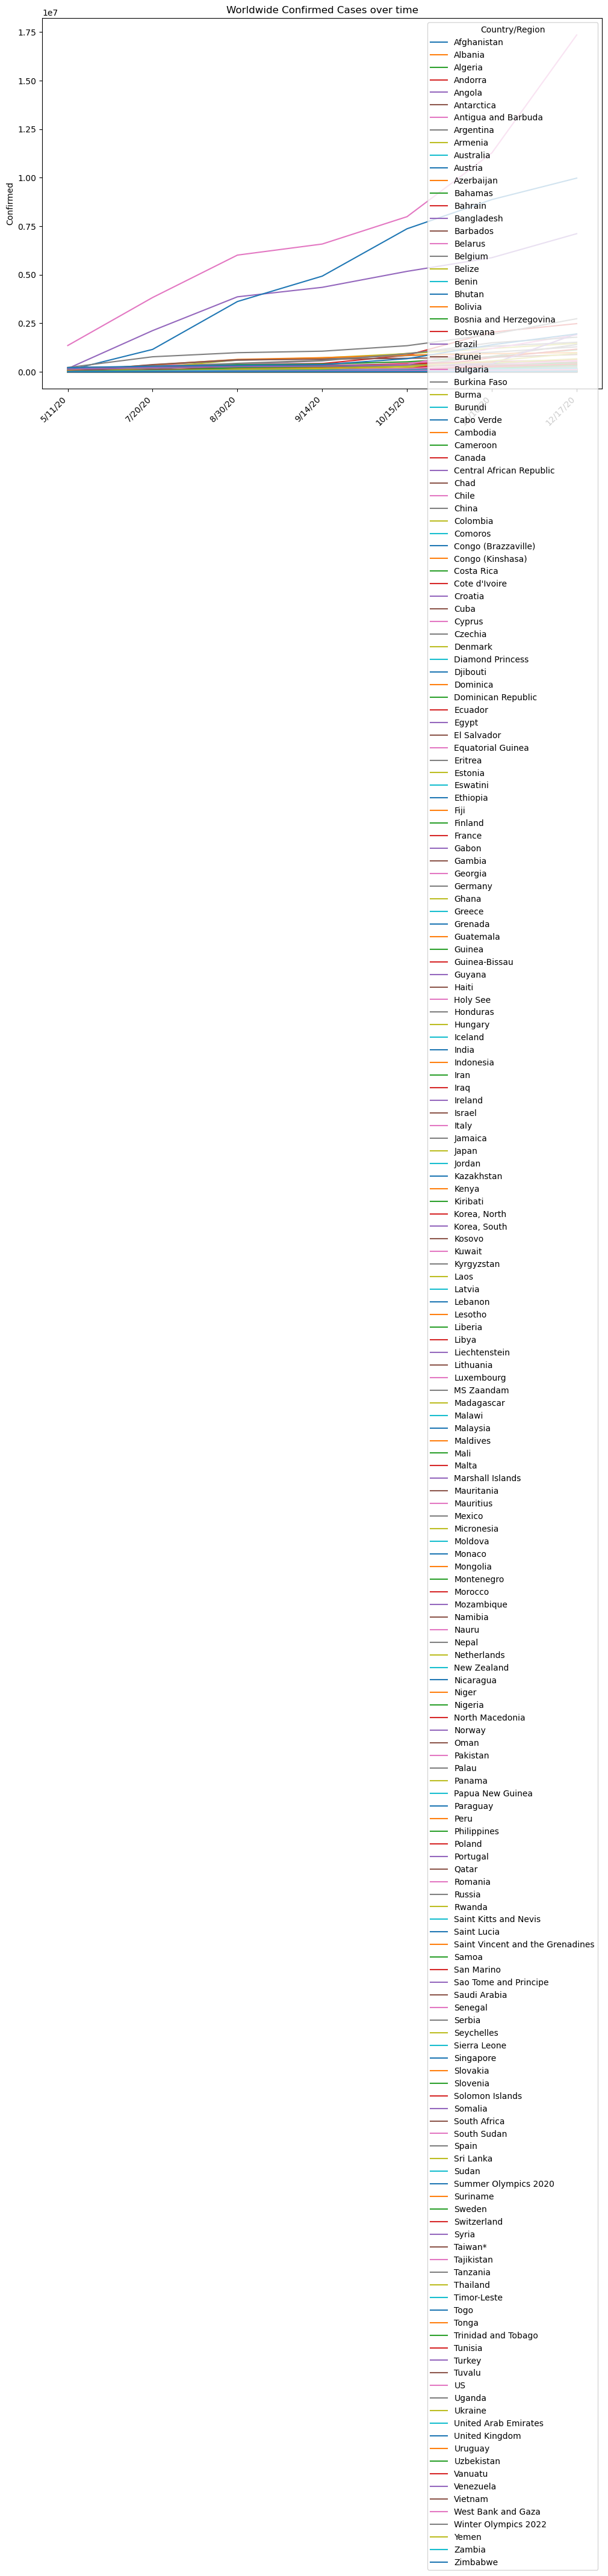

In [174]:
covid_data = pd.read_csv('https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

recovered_by_country = covid_data.groupby('Country/Region').sum().reset_index()
dates_to_plot = ['5/11/20', '7/20/20', '8/30/20', '9/14/20', '10/15/20', '11/16/20', '12/17/20']
recovered_by_country_subset = recovered_by_country[['Country/Region'] + dates_to_plot]


fig, ax = plt.subplots(figsize=(12, 8))
recovered_by_country_subset.set_index('Country/Region').T.plot(kind='line', ax=ax)
ax.set_ylabel('Confirmed')
ax.set_title('Worldwide Confirmed Cases over time')
plt.xticks(rotation=45, ha='right')
plt.show()
